##**SHETH L.U.J. & SIR M.V. COLLEGE**

####MANJIT SINGH T117

###**Practical No. 10**

**Aim:** Data Visualization and Storytelling
*   Create meaningful visualizations using data visualization tools
*   Combine multiple visualizations to tell a compelling data story.
*   Present the findings and insights in a clear and concise manner.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")
sns.set_theme()

df = pd.read_csv("bank.csv")

print("First 5 rows of dataset:")
display(df.head())

print("\nDataset Info:")
df.info()


First 5 rows of dataset:


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [ ]:
df["deposit"] = df["deposit"].map({"yes":1, "no":0})

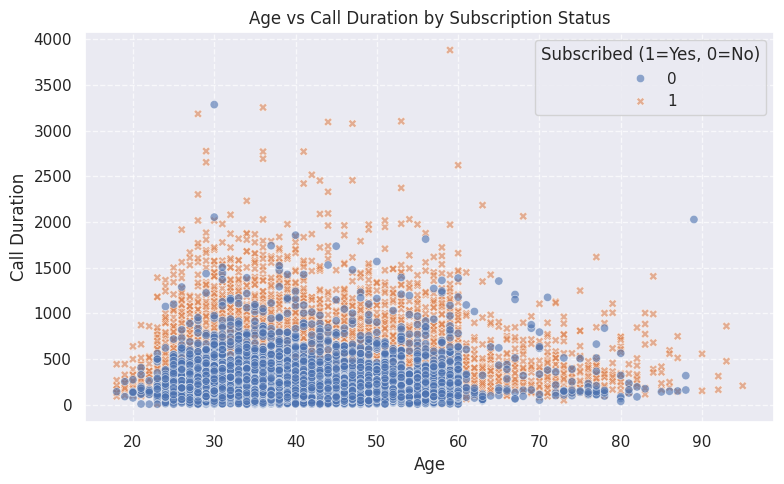

Observation: This scatter plot shows if specific age-duration combinations lead to higher subscription.


In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=df,
    x="age",
    y="duration",
    hue="deposit",
    style="deposit",
    alpha=0.6
)
plt.title("Age vs Call Duration by Subscription Status")
plt.xlabel("Age")
plt.ylabel("Call Duration")
plt.legend(title="Subscribed (1=Yes, 0=No)")
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("Observation: This scatter plot shows if specific age-duration combinations lead to higher subscription.")


/tmp/ipython-input-3992379661.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_rate = df.groupby('AgeGroup')['deposit'].mean().reset_index()


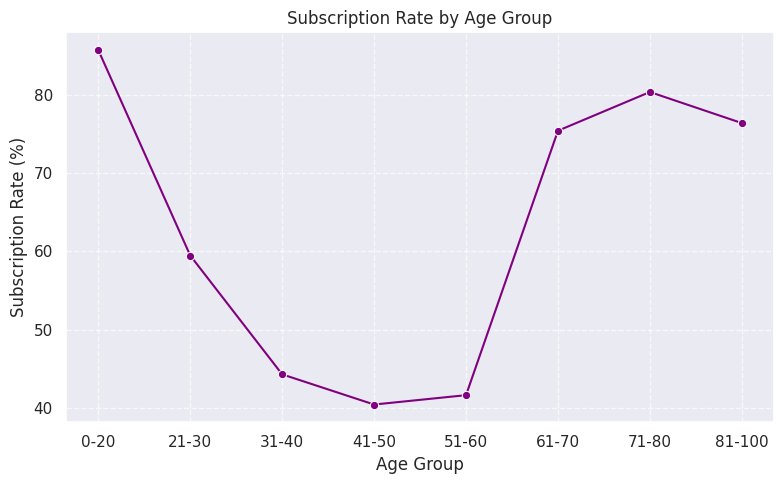

In [ ]:
age_bins = [0, 20, 30, 40, 50, 60, 70, 80, 100]
age_labels = ['0-20','21-30','31-40','41-50','51-60','61-70','71-80','81-100']
df['AgeGroup'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

age_rate = df.groupby('AgeGroup')['deposit'].mean().reset_index()
age_rate['deposit'] *= 100 # percentage

plt.figure(figsize=(8,5))
sns.lineplot(
    data=age_rate,
    x="AgeGroup",
    y="deposit",
    marker="o",
    color="purple"
)
plt.title("Subscription Rate by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Subscription Rate (%)")
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

df.drop(columns=['AgeGroup'], inplace=True)


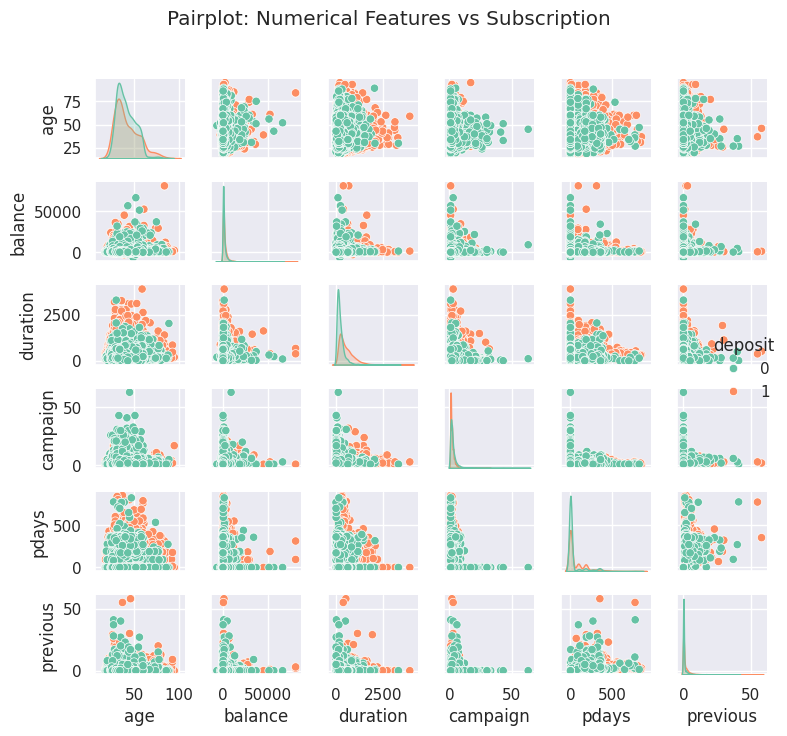

In [ ]:
num_cols = ['age','balance','duration','campaign','pdays','previous']

sns.pairplot(df[num_cols + ['deposit']], hue="deposit", palette="Set2", height=1.2)
plt.suptitle("Pairplot: Numerical Features vs Subscription", y=1.02)
plt.tight_layout()
plt.show()


/tmp/ipython-input-1877131231.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="deposit", y="balance", data=df, palette="Pastel1")


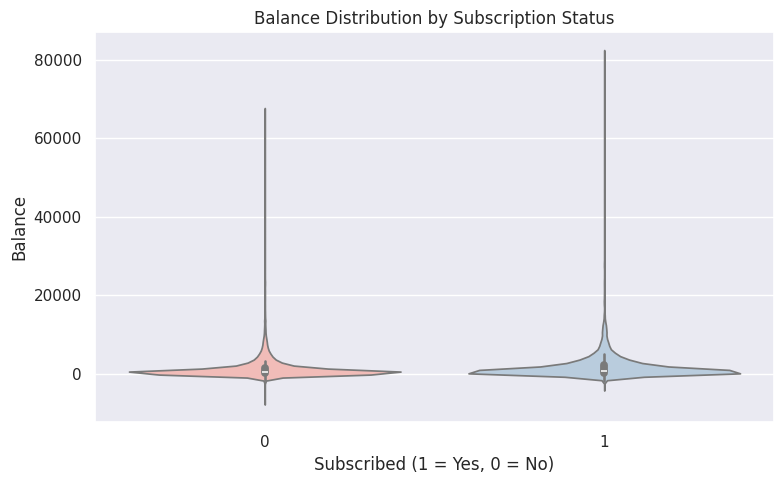

In [ ]:
plt.figure(figsize=(8,5))
sns.violinplot(x="deposit", y="balance", data=df, palette="Pastel1")
plt.title("Balance Distribution by Subscription Status")
plt.xlabel("Subscribed (1 = Yes, 0 = No)")
plt.ylabel("Balance")
plt.tight_layout()
plt.show()


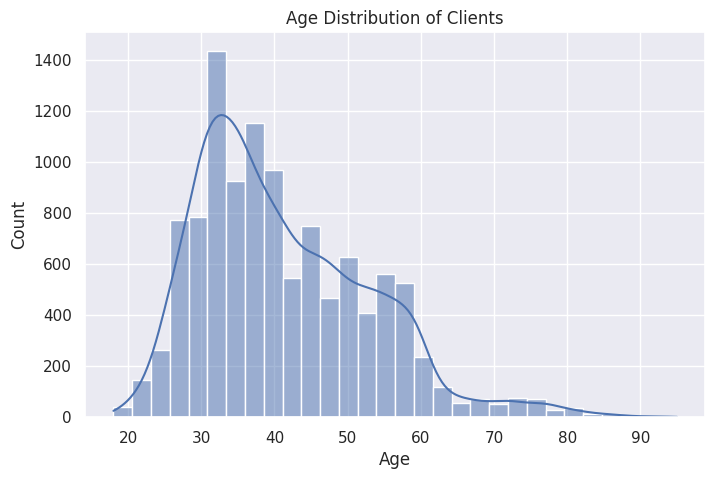

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x="age", bins=30, kde=True)
plt.title("Age Distribution of Clients")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


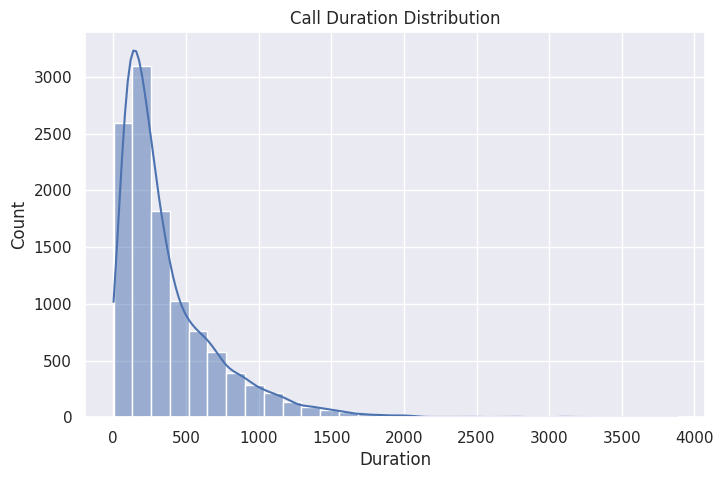

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x="duration", bins=30, kde=True)
plt.title("Call Duration Distribution")
plt.xlabel("Duration")
plt.ylabel("Count")
plt.show()


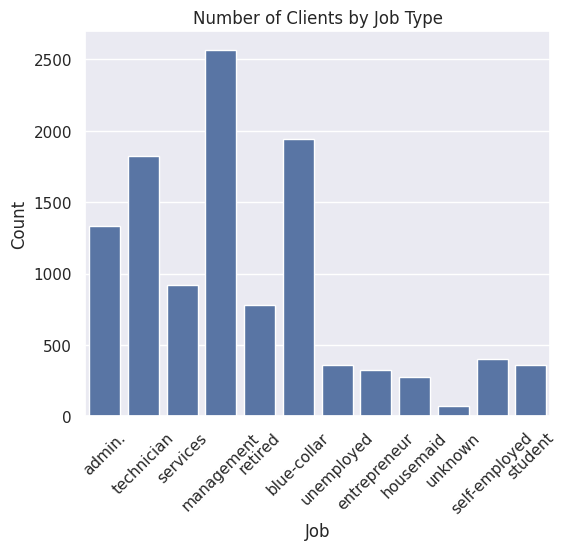

In [ ]:
plt.figure(figsize=(6,5))
sns.countplot(data=df, x="job")
plt.title("Number of Clients by Job Type")
plt.xlabel("Job")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


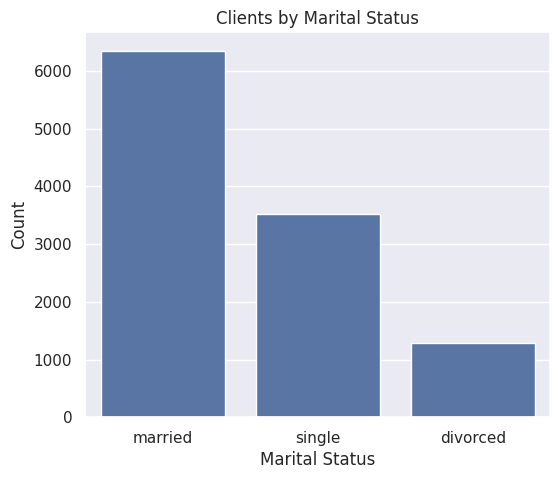

In [ ]:
plt.figure(figsize=(6,5))
sns.countplot(data=df, x="marital")
plt.title("Clients by Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.show()


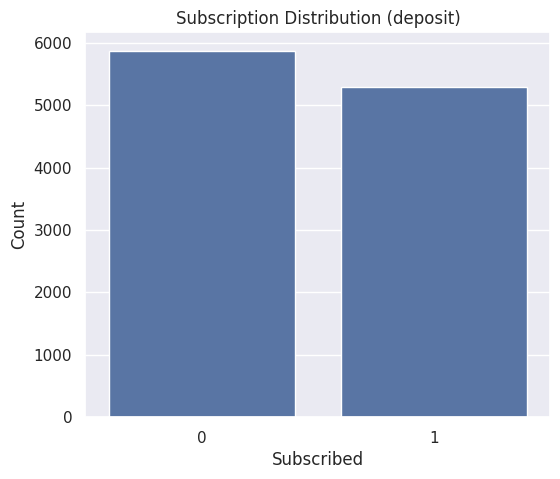

Overall Subscription Rate: 47.38%


In [ ]:
plt.figure(figsize=(6,5))
sns.countplot(data=df, x="deposit")
plt.title("Subscription Distribution (deposit)")
plt.xlabel("Subscribed")
plt.ylabel("Count")
plt.show()

rate = df["deposit"].mean() * 100
print(f"Overall Subscription Rate: {rate:.2f}%")


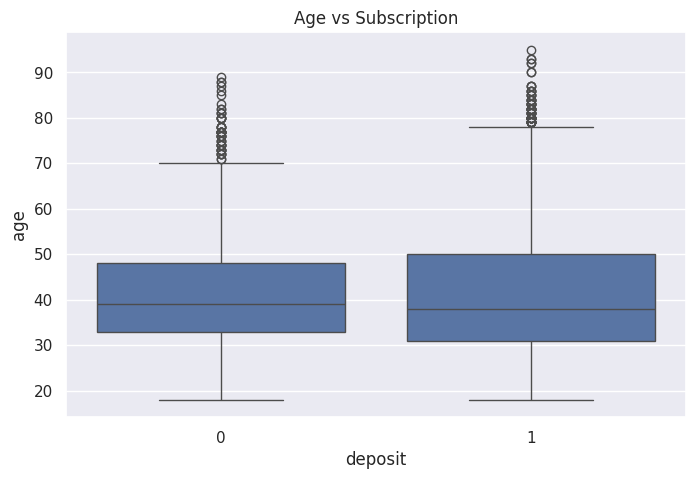

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="deposit", y="age")
plt.title("Age vs Subscription")
plt.show()

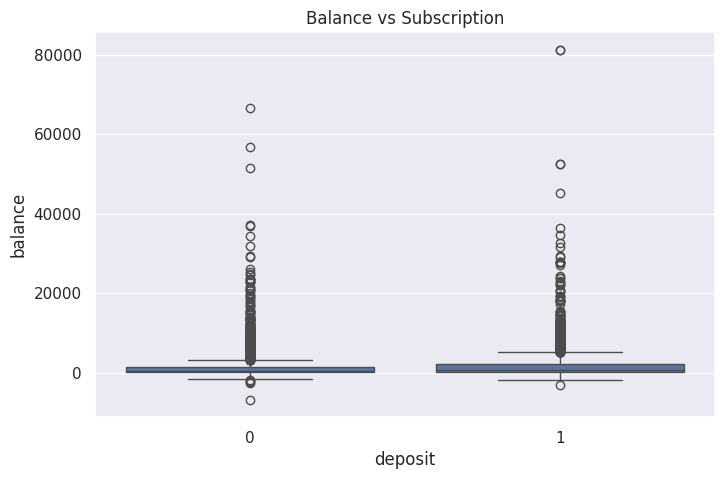

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="deposit", y="balance")
plt.title("Balance vs Subscription")
plt.show()

,job,deposit
0,admin.,47.301349
1,blue-collar,36.419753
2,entrepreneur,37.500000
3,housemaid,39.781022
4,management,50.701481
5,retired,66.323907
6,self-employed,46.172840
7,services,39.978332
8,student,74.722222
9,technician,46.077894


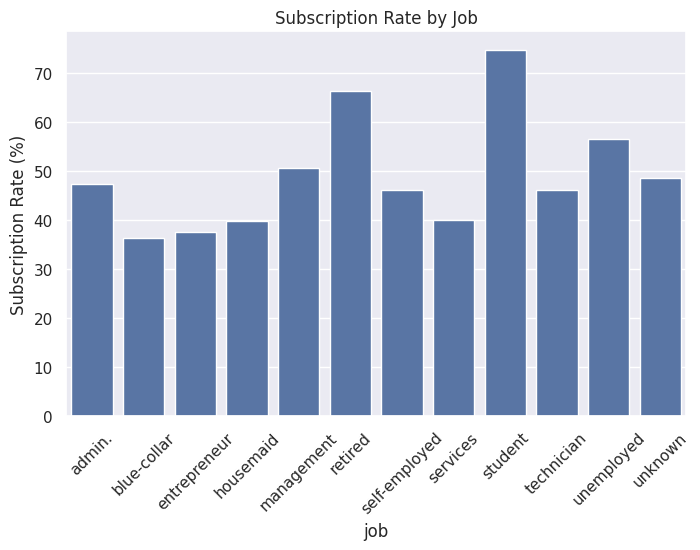

In [ ]:
job_rate = df.groupby("job")["deposit"].mean().reset_index()
job_rate["deposit"] *= 100

display(job_rate)

plt.figure(figsize=(8,5))
sns.barplot(data=job_rate, x="job", y="deposit")
plt.xticks(rotation=45)
plt.title("Subscription Rate by Job")
plt.ylabel("Subscription Rate (%)")
plt.show()


,marital,deposit
0,divorced,48.105182
1,married,43.378995
2,single,54.349062


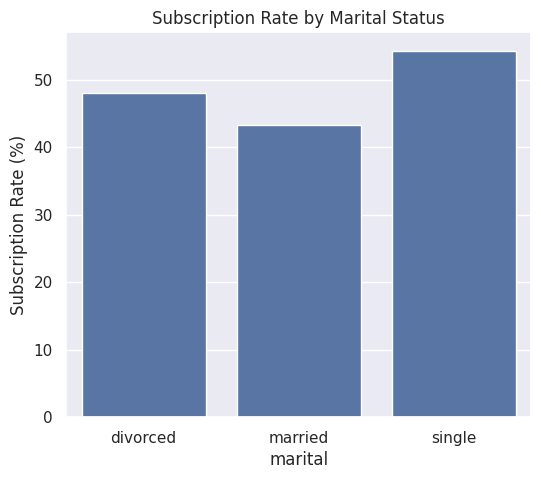

In [ ]:
mar_rate = df.groupby("marital")["deposit"].mean().reset_index()
mar_rate["deposit"] *= 100

display(mar_rate)

plt.figure(figsize=(6,5))
sns.barplot(data=mar_rate, x="marital", y="deposit")
plt.title("Subscription Rate by Marital Status")
plt.ylabel("Subscription Rate (%)")
plt.show()


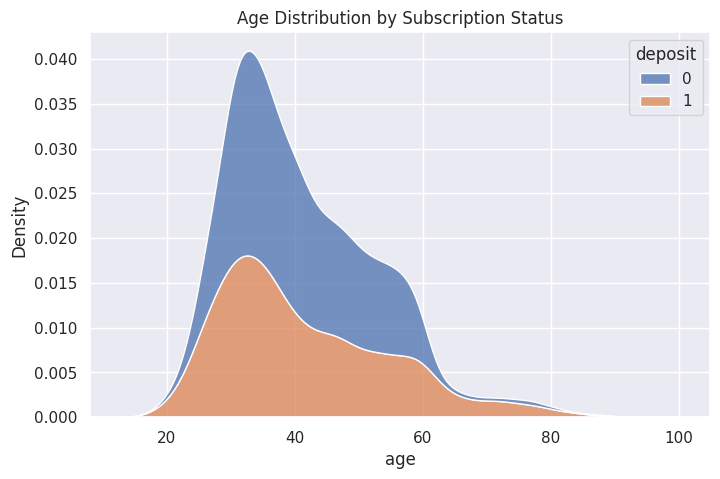

In [ ]:
plt.figure(figsize=(8,5))
sns.kdeplot(data=df, x="age", hue="deposit", multiple="stack")
plt.title("Age Distribution by Subscription Status")
plt.show()


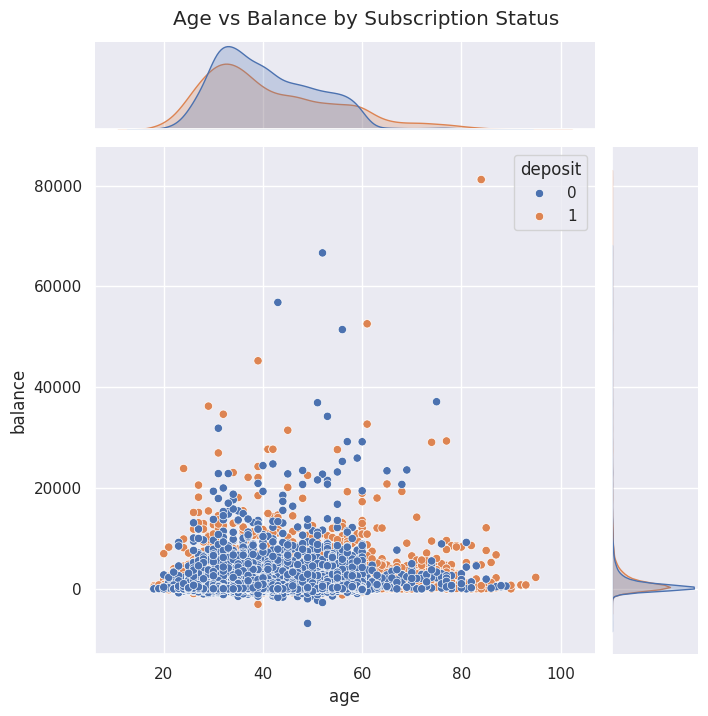

In [ ]:
sns.jointplot(data=df, x="age", y="balance", hue="deposit", kind="scatter", height=7)
plt.suptitle("Age vs Balance by Subscription Status", y=1.02)
plt.show()


,No Subscription (0),Subscribed (1)
job,,
admin.,703,631
blue-collar,1236,708
entrepreneur,205,123
housemaid,165,109
management,1265,1301
retired,262,516
self-employed,218,187
services,554,369
student,91,269


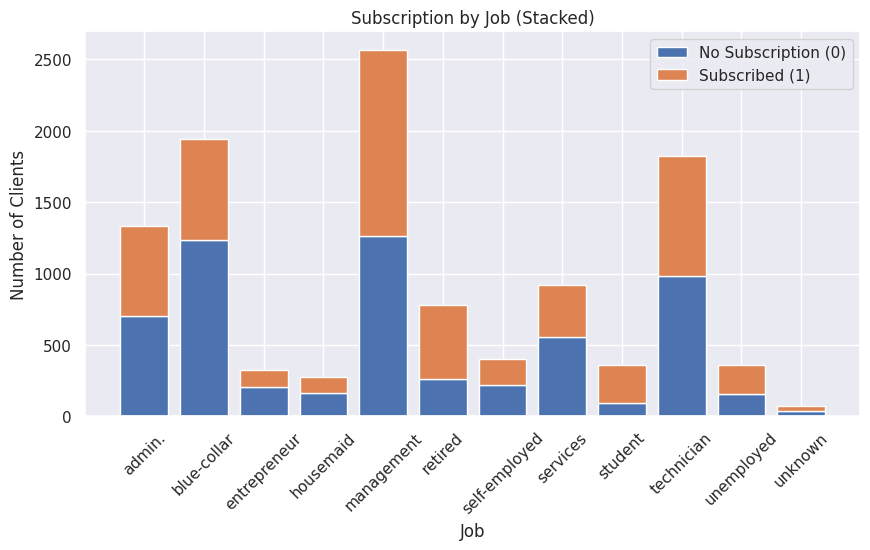

In [ ]:
job_counts = df.groupby(["job","deposit"]).size().reset_index(name="Count")
job_pivot = job_counts.pivot(index="job", columns="deposit", values="Count")
job_pivot.columns = ["No Subscription (0)", "Subscribed (1)"]

display(job_pivot)

plt.figure(figsize=(10,5))
bottom = None
for col in job_pivot.columns:
    if bottom is None:
        plt.bar(job_pivot.index, job_pivot[col])
        bottom = job_pivot[col]
    else:
        plt.bar(job_pivot.index, job_pivot[col], bottom=bottom)
        bottom += job_pivot[col]

plt.xticks(rotation=45)
plt.title("Subscription by Job (Stacked)")
plt.xlabel("Job")
plt.ylabel("Number of Clients")
plt.legend(job_pivot.columns)
plt.show()


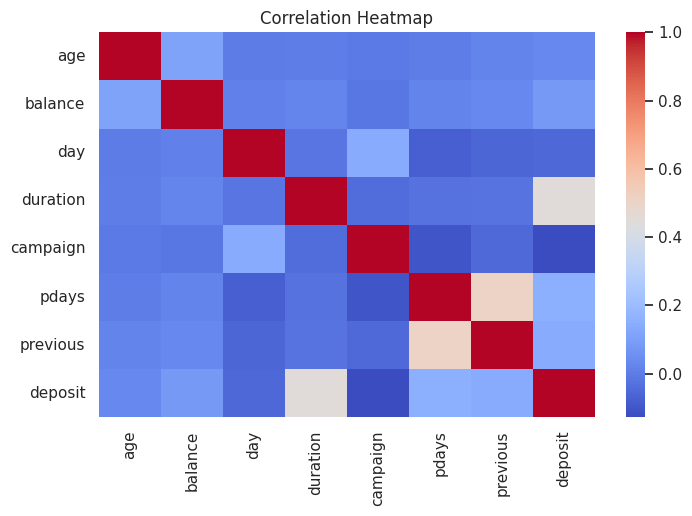

In [ ]:
num_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(8,5))
sns.heatmap(num_df.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


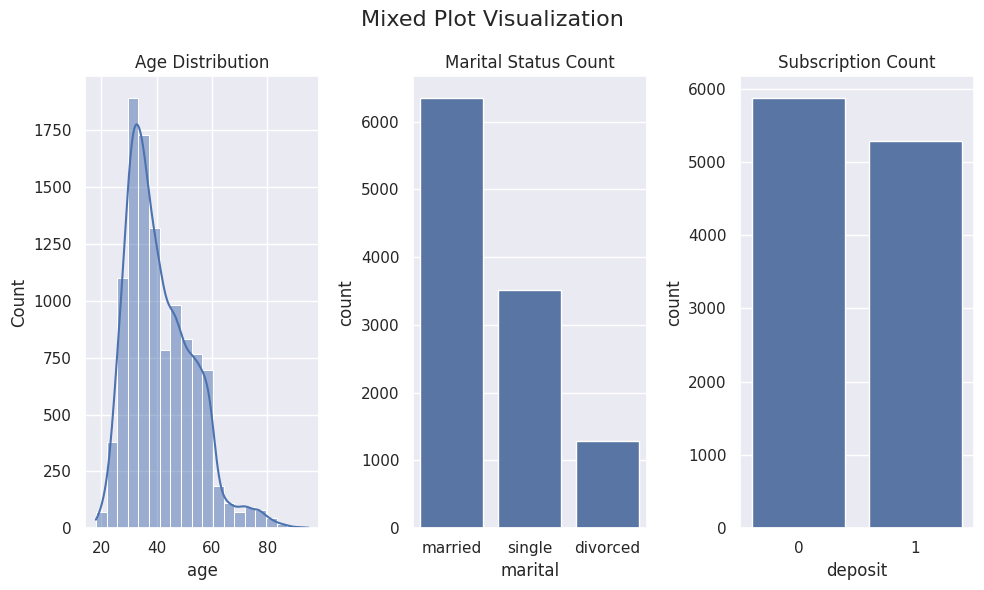

In [ ]:
plt.figure(figsize=(10,6))

plt.subplot(1,3,1)
sns.histplot(df['age'], bins=20, kde=True)
plt.title("Age Distribution")

plt.subplot(1,3,2)
sns.countplot(data=df, x="marital")
plt.title("Marital Status Count")

plt.subplot(1,3,3)
sns.countplot(data=df, x="deposit")
plt.title("Subscription Count")

plt.suptitle("Mixed Plot Visualization", fontsize=16)
plt.tight_layout()
plt.show()


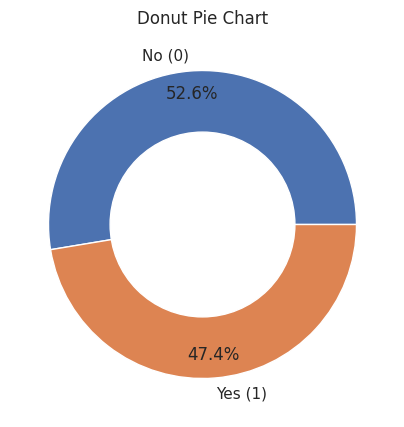

In [ ]:
sub_counts = df['deposit'].value_counts()

plt.figure(figsize=(5,5))
plt.pie(sub_counts, labels=['No (0)','Yes (1)'], autopct='%1.1f%%', pctdistance=0.85)
circle = plt.Circle((0,0), 0.60, fc='white')
plt.gca().add_artist(circle)
plt.title("Donut Pie Chart")
plt.show()

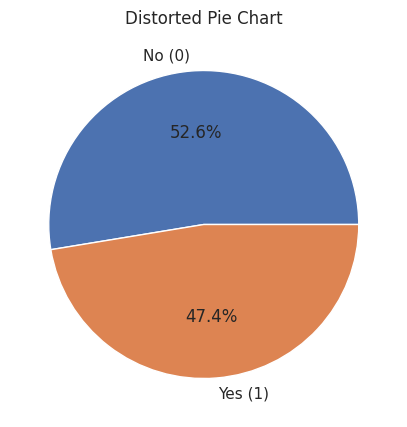

In [ ]:
plt.figure(figsize=(5,5))
plt.pie(sub_counts, labels=['No (0)','Yes (1)'], autopct='%1.1f%%')
plt.title("Distorted Pie Chart")
plt.gca().set_aspect("auto")
plt.show()

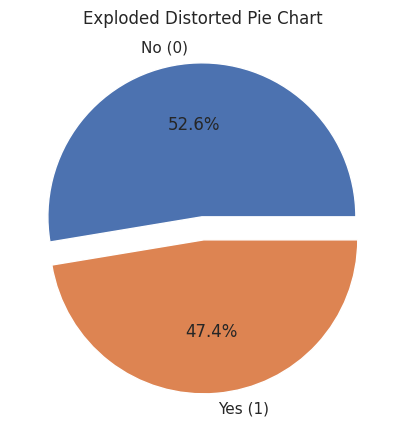

In [ ]:
plt.figure(figsize=(5,5))
plt.pie(sub_counts, labels=['No (0)','Yes (1)'], autopct='%1.1f%%', explode=[0.05,0.1])
plt.title("Exploded Distorted Pie Chart")
plt.show()

In [ ]:
print("===== DATA STORY & KEY INSIGHTS =====\n")

print(f"1) Overall subscription rate: {rate:.2f}%\n")

print("2) Age:")
print("- Older individuals show different subscription tendencies.\n")

print("3) Job Influence:")
print("- Some job categories show higher subscription likelihood.\n")

print("4) Balance:")
print("- Higher balance may reflect different behaviours.\n")

print("5) Marital Status:")
print("- Subscription varies across marital groups.\n")

print("6) Correlations:")
print("- Numerical correlations guide predictive modelling.\n")

print("Overall:")
print("- These insights help the bank identify which clients are more likely to subscribe to term deposits.")


===== DATA STORY & KEY INSIGHTS =====

1) Overall subscription rate: 47.38%

2) Age:
- Older individuals show different subscription tendencies.

3) Job Influence:
- Some job categories show higher subscription likelihood.

4) Balance:
- Higher balance may reflect different behaviours.

5) Marital Status:
- Subscription varies across marital groups.

6) Correlations:
- Numerical correlations guide predictive modelling.

Overall:
- These insights help the bank identify which clients are more likely to subscribe to term deposits.
